In [1]:
# 내 맘대로 구성
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt

In [2]:
# 훈련 데이터 처리 
data_file=open("./data/mnist_train_100.csv", 'r')
data_list=data_file.readlines()
data_file.close()

z=0
label_train=[]
while z<100:
    label_train.append(int(data_list[z][0])) # 레이블빼기
    data_list[z]=data_list[z][1:].split(",") # 나머지 부해 저ㅇ
    del data_list[z][0] # 앞ㅔ 빈칸 지우기
    data_list[z][-1]=data_list[z][-1][0] # 마지막 줄바꿈 지우기
    data_list[z]=np.array(data_list[z], np.int32) # 자료형 숫자로 변환
    data_list[z]=data_list[z]*(0.99/250)+0.01 # 데이터를 준비
    z+=1

In [3]:
# 목표치 데이터 만들기. 학습해야하니까
output_node_n=10

targets=[]
z=0
while z<100:
    target=np.zeros(10)+.01
    target[label_train[z]]=.99
    targets.append(target)
    z+=1

In [4]:
# 테스트 데이터 처리
test_file=open("./data/mnist_test_10.csv", 'r')
test_list=test_file.readlines()
test_file.close()

z=0
label_test=[]
while z<10:
    label_test.append(int(test_list[z][0])) # 레이블빼기
    test_list[z]=test_list[z][1:].split(",") # 나머지 부해 저ㅇ
    del test_list[z][0] # 앞ㅔ 빈칸 지우기
    test_list[z][-1]=test_list[z][-1][0] # 마지막 줄바꿈 지우기
    test_list[z]=np.array(test_list[z], np.int32) # 자료형 숫자로 변환
    test_list[z]=test_list[z]*(0.99/250)+0.01 # 데이터를 준비
    z+=1

In [5]:
# 네트워크 정의
class neural_network:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learninggrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes

        self.wih=np.random.normal(.0, pow(self.hnodes, -.5), (self.hnodes, self.inodes))
        self.who=np.random.normal(.0, pow(self.onodes, -.5), (self.onodes, self.hnodes))

        self.lr=learninggrate

        self.activation_fun=lambda x : 1 / (1 + np.exp(-x))
        pass

    def query(self, input_list): #질의
        inputs=np.array(input_list, ndmin=2).T # 이거 차원을 2로 한다는게 뭔의미야?

        hidden_inputs=np.dot(self.wih, inputs)
        hidden_outputs=self.activation_fun(hidden_inputs)

        final_input=np.dot(self.who ,hidden_outputs)
        final_outputs=self.activation_fun(final_input)

        return final_outputs


    def train(self, input_list, target_lsit): # 학습
        inputs=np.array(input_list, ndmin=2).T
        target=np.array(target_lsit, ndmin=2).T

        hidden_input=np.dot(self.wih, inputs)
        hidden_output=self.activation_fun(hidden_input)

        final_input=np.dot(self.who, hidden_output)
        final_output=self.activation_fun(final_input)

        # 오차 정의
        output_err=target-final_output
        hidden_err=np.dot(self.who.T, output_err)

        # ho 역전파
        delta_w1=self.lr*np.dot(output_err*final_output*(1-final_output), hidden_output.T)
        self.who=self.who+delta_w1

        # ih역전파
        delta_w2=self.lr*np.dot(hidden_err*hidden_output*(1-hidden_output), inputs.T)
        self.wih=self.wih+delta_w2
        pass


In [6]:
# 신경망 지정
input_n=784
hidden_n=100
ouput_n=10

learn_rate=.3

n=neural_network(input_n ,hidden_n ,ouput_n, learn_rate)

In [7]:
# 훈련
h=0 # 어포취
while h<3:
    z=0
    while z<100:
        n.train(data_list[z], targets[z])
        z+=1
    h+=1

In [8]:
# 테스트 데이터들을 모두 확인
a=0
fail=[]
while a<10:
    print("a:",a)
    print("the real answer is",label_test[a])

    re=n.query(test_list[a])
    # print("result are\n",re)
    b=np.max(re)
    # print(a)
    num,_=np.where(re==b)
    num,=num
    print("my nn's answer is",num)
    print("==================")
    if label_test[a]==num: pass
    else:
        fail.append(a)
    a+=1


a: 0
the real answer is 7
my nn's answer is 7
a: 1
the real answer is 2
my nn's answer is 2
a: 2
the real answer is 1
my nn's answer is 1
a: 3
the real answer is 0
my nn's answer is 0
a: 4
the real answer is 4
my nn's answer is 4
a: 5
the real answer is 1
my nn's answer is 1
a: 6
the real answer is 4
my nn's answer is 4
a: 7
the real answer is 9
my nn's answer is 4
a: 8
the real answer is 5
my nn's answer is 4
a: 9
the real answer is 9
my nn's answer is 4


[7, 8, 9]


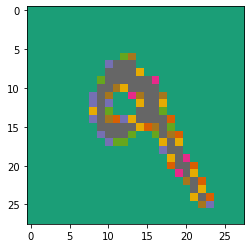

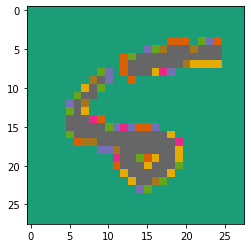

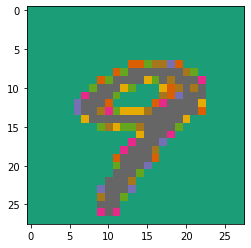

In [9]:
# 틀린것 들이 어느정도 오해할만한것인지 출력해보기

print(fail)
z=0
while z<len(fail):
        
    ima=np.array(test_list[fail[z]]).reshape((28,28))
    plt.imshow(ima, cmap='Dark2', interpolation="None")
    plt.show()
    z+=1